In [2]:
from configuration_scripts import split_yolo_img_set, create_data_yaml
from pathlib import Path
from pillow_heif import register_heif_opener

In [3]:
register_heif_opener() # this allows the program to process .heic images
cpd = Path.cwd().parent
src = cpd/'data'/'labeled'/'not_split'/'labeled.zip'
dst = cpd/'data'/'labeled'
split_yolo_img_set(src, dst, test_size=0.2, random_state=42)

processing training images
  20/20 items processed. (0 failed)
processing validation images
  6/6 items processed. (0 failed)
processing training label files
  20/20 items processed. (0 failed)
processing validation label files
  6/6 items processed. (0 failed)


In [4]:
path_to_data_yaml = cpd/'data'/'labeled'/'data.yaml'
create_data_yaml(src, path_to_data_yaml)

Created config file at c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\shelf-scanner\data\labeled\data.yaml

File contents:

names:
- duracell
- energizer
- kodak
- philips
nc: 4
path: c:/Users/shade/OneDrive/Documentos/My coding projects/4geeks projects/shelf-scanner/data/labeled
train: train/images
val: validation/images



In [ ]:
from ultralytics import YOLO
model_path = cpd/'models'/'yolo11s.pt'

model = YOLO(model = model_path)
model.train(
    data=str(path_to_data_yaml),
    epochs=60,
    imgsz=640,
    batch=4, # modify if you have a decent computer
    project=cpd/'models'/'runs'
)

New https://pypi.org/project/ultralytics/8.3.191 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.189  Python-3.13.2 torch-2.8.0+cpu CPU (Intel Core(TM) i5-8250U 1.60GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\shade\OneDrive\Documentos\My coding projects\4geeks projects\shelf-scanner\data\labeled\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=c:\Users\shade\OneDrive\Documentos

# Order validation model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

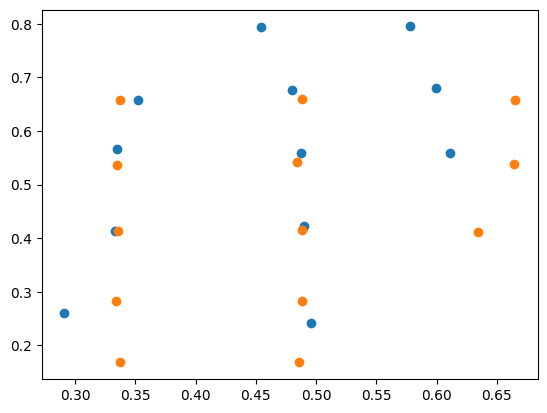

In [147]:
def getcoor(string):
    string2 = string.split('\n')

    string3 = [strn.split(' ') for strn in string2]
    for j, vec in enumerate(string3):
        for i, val in enumerate(vec):
            string3[j][i] = float(val)
    df = pd.DataFrame(string3, columns=['class','x','y','h','w'])
    
    return df

string1 = """3 0.29099756690997564 0.2605839416058394 0.17323600973236009 0.14160583941605842
3 0.4953771289537713 0.24233576642335766 0.1343065693430657 0.13722627737226276
1 0.33284671532846716 0.4131386861313869 0.14014598540145984 0.1021897810218978
1 0.4895377128953771 0.42189781021897815 0.12652068126520674 0.11094890510948907
1 0.33479318734793184 0.5664233576642336 0.11289537712895374 0.08175182481751818
1 0.4875912408759124 0.5583941605839415 0.110948905109489 0.07445255474452551
1 0.6111922141119221 0.5591240875912409 0.11289537712895388 0.09051094890510945
1 0.3523114355231144 0.6583941605839416 0.05839416058394164 0.04087591240875909
1 0.47980535279805353 0.6759124087591241 0.09927007299270066 0.06131386861313871
1 0.5995133819951338 0.6802919708029197 0.10510948905109486 0.06715328467153285
0 0.4545012165450122 0.7934306569343066 0.09927007299270073 0.06277372262773724
0 0.5781021897810219 0.7948905109489052 0.09343065693430659 0.054014598540146036"""

string2 = """3 0.336877903118779 0.1678832116788321 0.14437624419376247 0.10218978102189784
3 0.4857015814727699 0.16841631151321843 0.14243805386356156 0.10028730554504063
1 0.3342042689670427 0.28175182481751826 0.14972351249723517 0.10218978102189784
1 0.48793823269188236 0.2832116788321168 0.1310080734350808 0.1051094890510949
1 0.3352982417023645 0.41325037122394276 0.13962677648467556 0.10284565517629168
1 0.48851285885165596 0.41452954603956826 0.13868968402504683 0.09824062584003983
1 0.6346992825537323 0.4106920215926917 0.14618642370207624 0.105915674733793
1 0.33436114924273574 0.5355394835977423 0.11713655745358682 0.08647221753628508
1 0.48382739655351253 0.54244702760212 0.14431223878281899 0.10438066495504224
1 0.6642176950320362 0.537330328339618 0.1508718860002199 0.09619394613503901
0 0.3376409728514362 0.6575727610084168 0.14056386894430412 0.10028730554504073
0 0.4880443126218415 0.6591077707871675 0.1396267764846754 0.09926396569254031
0 0.6651547874916649 0.6580844309346671 0.13962677648467547 0.09926396569254024"""

df1 = getcoor(string1)
df2 = getcoor(string2)
df2.rename_axis('position', inplace=True)
plt.scatter(df1.x, df1.y)
plt.scatter(df2.x, df2.y)
plt.show()


In [148]:
base_order_matrix = getcoor(string2)
base_order_matrix.rename_axis('position', inplace=True)
base_order_matrix.x = MinMaxScaler().fit_transform(df2[['x']])
base_order_matrix.y = MinMaxScaler().fit_transform(df2[['y']])
position_finder = KNeighborsClassifier(n_neighbors=1)
position_finder.fit(base_order_matrix[['x','y']], base_order_matrix.index)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [149]:
base_order_matrix

,class,x,y,h,w
position,,,,,
0,3.0,0.008079,0.000000,0.144376,0.102190
1,3.0,0.457764,0.001085,0.142438,0.100287
2,1.0,0.000000,0.231806,0.149724,0.102190
3,1.0,0.464523,0.234777,0.131008,0.105109
4,1.0,0.003306,0.499501,0.139627,0.102846
5,1.0,0.466259,0.502105,0.138690,0.098241
6,1.0,0.907976,0.494293,0.146186,0.105916
7,1.0,0.000474,0.748448,0.117137,0.086472
8,1.0,0.452101,0.762510,0.144312,0.104381


In [154]:
class_dic = {
    0: 'duracell',
    1: 'energizer',
    2: 'kodak',
    3: 'philips',
}

SKU_df = base_order_matrix[['class']].copy()
SKU_df['SKU'] = SKU_df['class'].map(class_dic)

In [153]:
def check_positions(df:pd.DataFrame):
    def check_row(row:pd.Series):
        is_present = row.name in df.index
        if is_present:
            if row['class'] == (df.loc[row.name])['class']:
                return True
        return False
    df = df.copy()
    df.x = MinMaxScaler().fit_transform(df[['x']])
    df.y = MinMaxScaler().fit_transform(df[['y']])
    positions = position_finder.predict(df[['x','y']])
    positions = pd.Series(positions, name='positions')
    df.set_index(positions, drop=True, inplace=True)
    ret = SKU_df.copy()
    ret['order_comply'] = ret.apply(check_row, axis=1)
    return ret

check_positions(df1)

,class,SKU,order_comply
position,,,
0,3.0,philips,True
1,3.0,philips,True
2,1.0,energizer,True
3,1.0,energizer,True
4,1.0,energizer,True
5,1.0,energizer,True
6,1.0,energizer,True
7,1.0,energizer,True
8,1.0,energizer,True


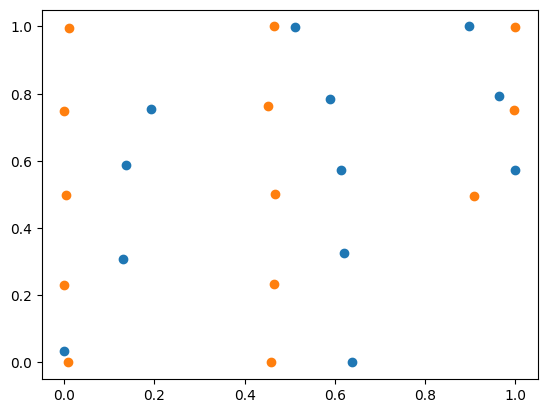

In [68]:
dfs1 = df1.copy()
dfs2 = df2.copy()

dfs1.x = MinMaxScaler().fit_transform(df1[['x']])
dfs1.y = MinMaxScaler().fit_transform(df1[['y']])
dfs2.x = MinMaxScaler().fit_transform(df2[['x']])
dfs2.y = MinMaxScaler().fit_transform(df2[['y']])


plt.scatter(dfs1.x, dfs1.y)
plt.scatter(dfs2.x, dfs2.y)
plt.show()

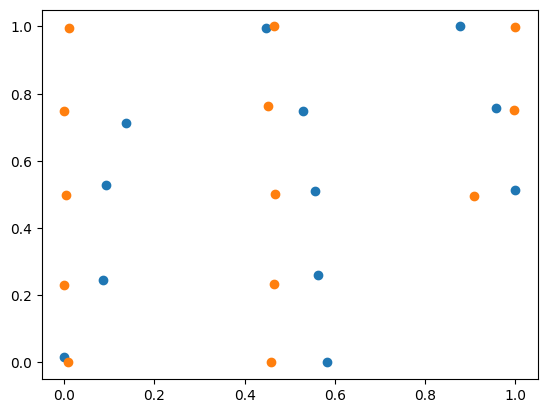

In [69]:
plt.scatter(dfs1.x**1.2, dfs1.y**1.2)
plt.scatter(dfs2.x, dfs2.y)
plt.show()